# 2‐dimensional random number generator for a Gaussian mixture model

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.



covariance_type: full
weight: 0.33010097022270324
weight error: 0.009696099027989284
mean:
 [[-0.02772302  1.09550384]
 [ 1.96193304  0.99235707]] 

covariance:
 [[[ 0.07582285 -0.01391688]
  [-0.01391688  0.26986358]]

 [[ 0.28171543 -0.02918264]
  [-0.02918264  0.22174859]]] 

accurcy: 0.99
run time: 0.008000850677490234

covariance_type: tied
weight: 0.6434373991002976
weight error: 0.03484438392736161
mean:
 [[2.00605652 0.98676429]
 [0.04031228 1.09794148]] 

covariance:
 [[ 0.20262596 -0.01938599]
 [-0.01938599  0.23714831]] 

accurcy: 0.98
run time: 0.00800180435180664

covariance_type: diag
weight: 0.33214264879086886
weight error: 0.0035710571984506044
mean:
 [[-0.02346643  1.10092675]
 [ 1.96589862  0.98934479]] 

covariance:
 [[0.07839299 0.2714728 ]
 [0.27736369 0.22018861]] 

accurcy: 0.9933333333333333
run time: 0.0039997100830078125

covariance_type: spherical
weight: 0.3522162515969028
weight error: 0.05664981144051982
mean:
 [[0.02915723 1.10367819]
 [1.99893251 0.984

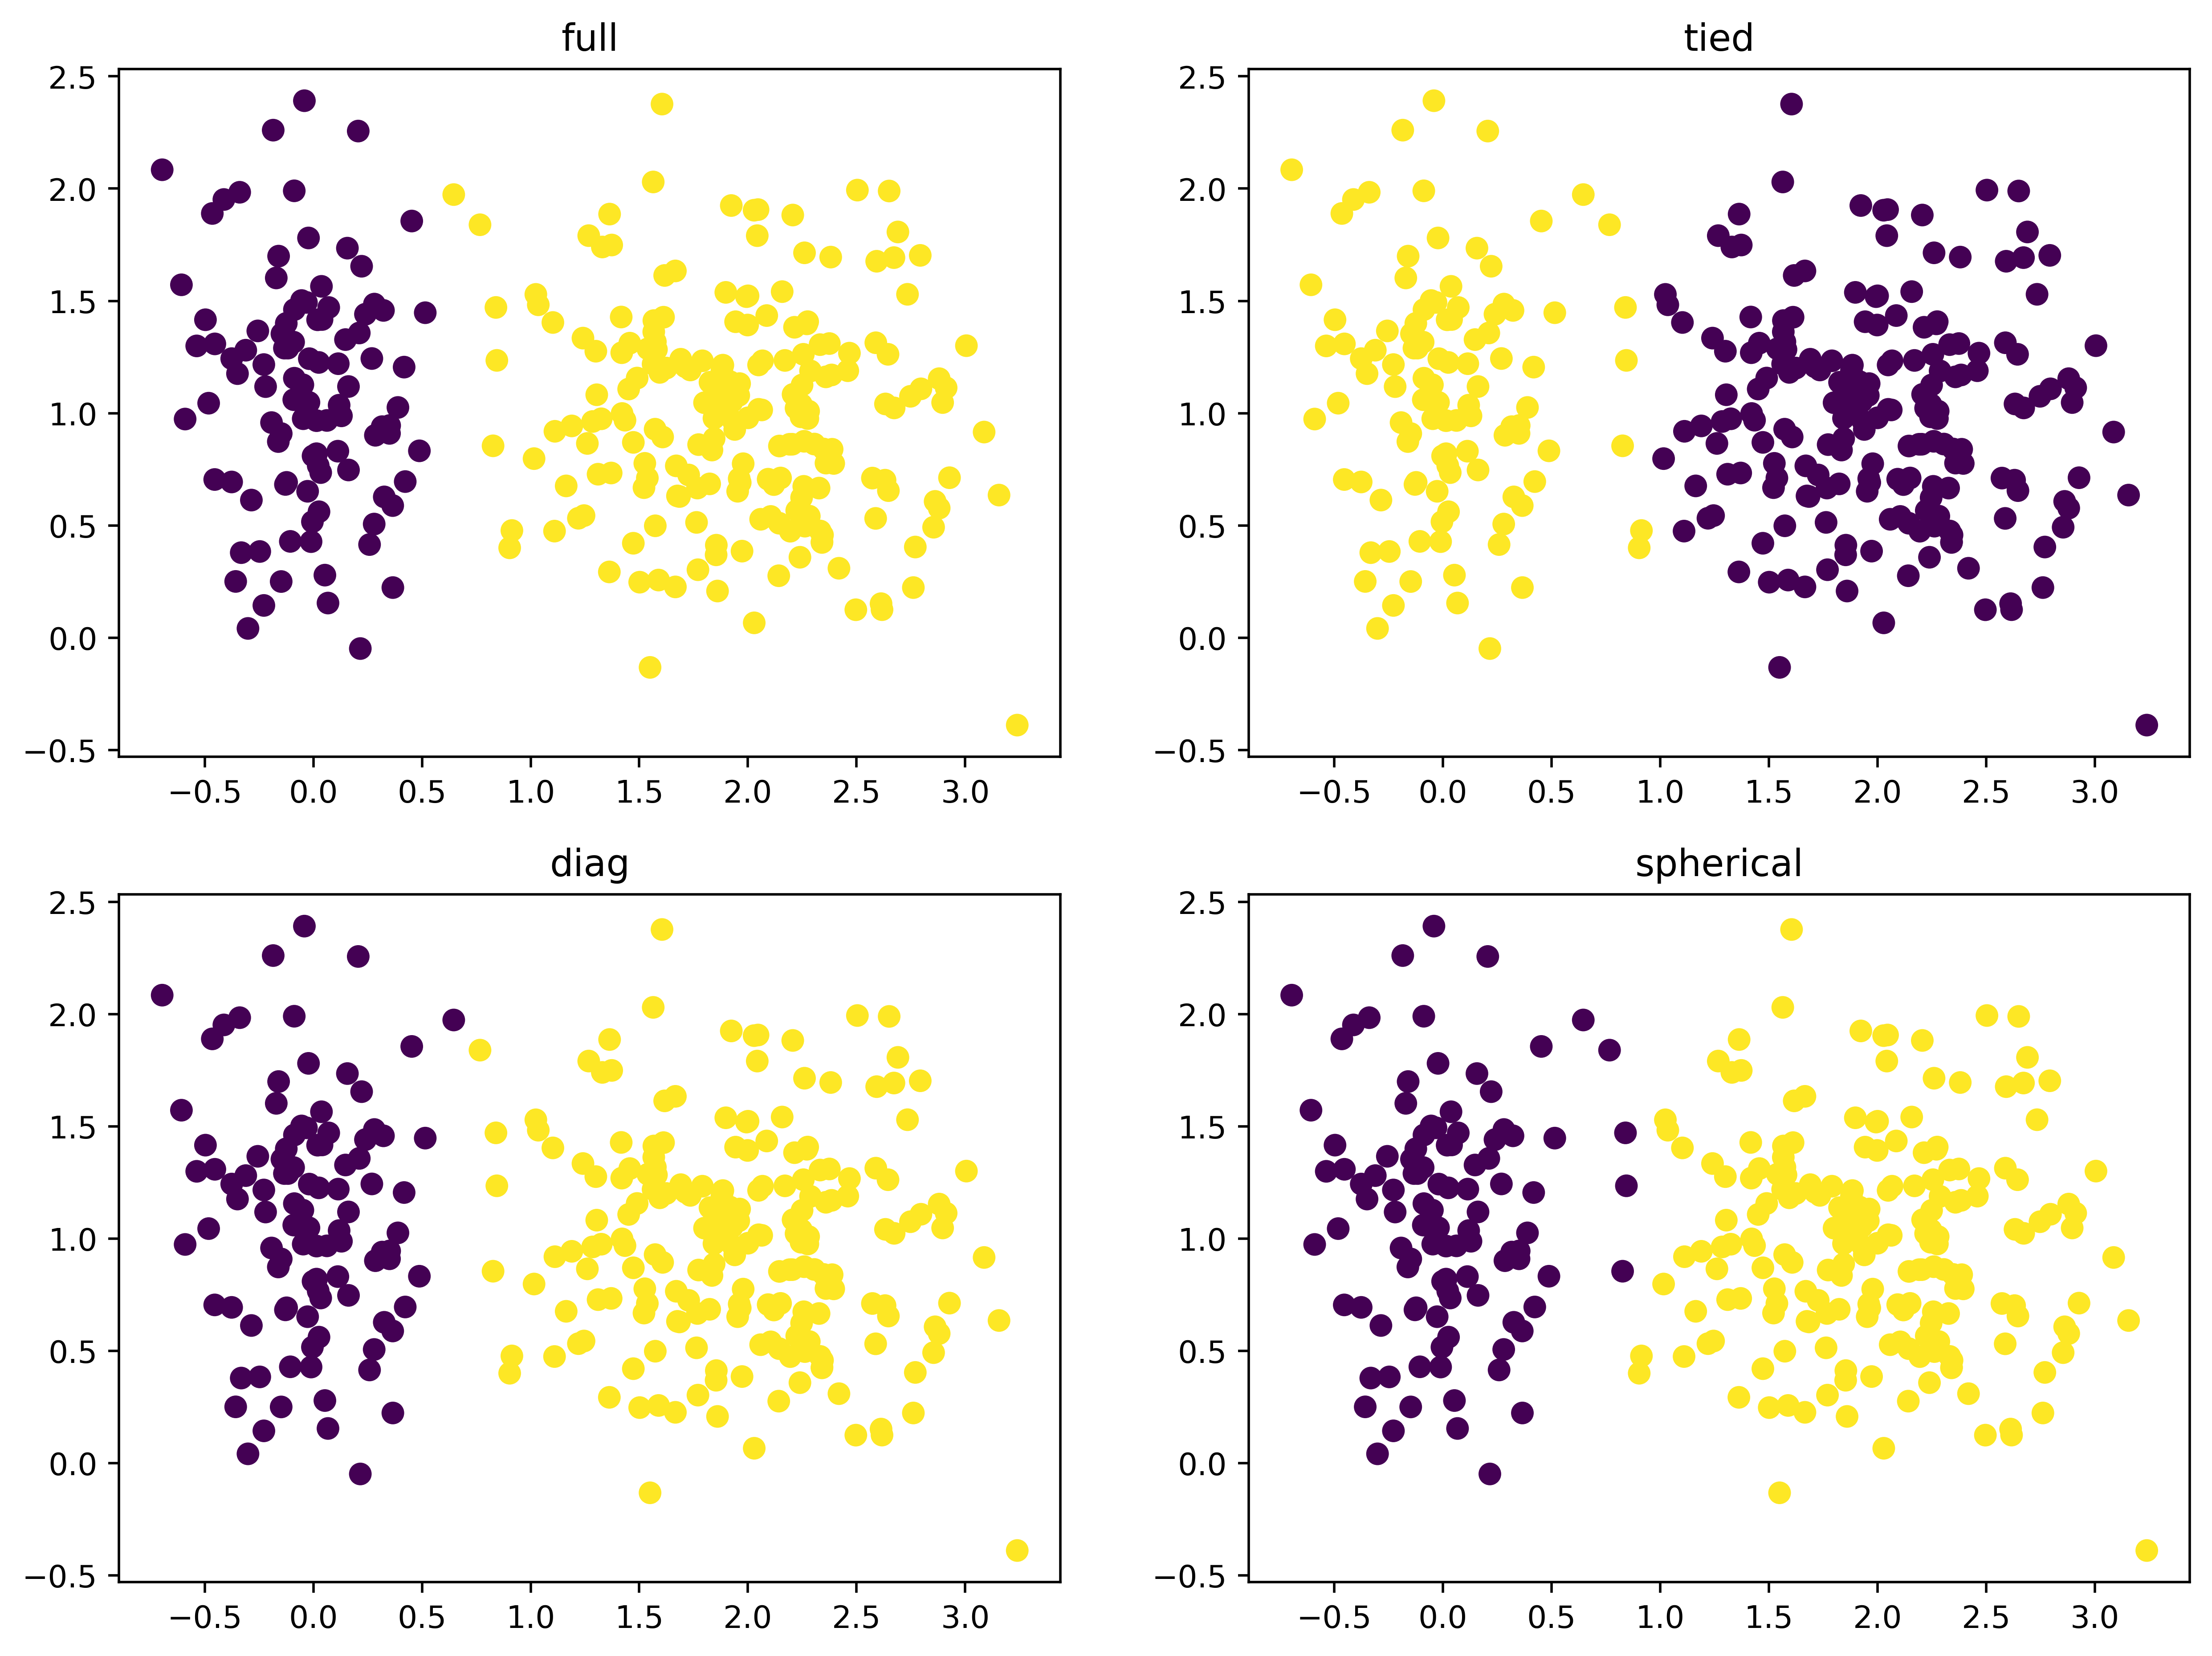

In [1]:
#2‐dimensional random number generator for a Gaussian mixture model

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

covariance_type = ['full', 'tied', 'diag', 'spherical']
cov1 = np.mat("0 0.3;0.1 0")
cov2 = np.mat("0 0.2;0.3 0")
u1 = np.array([0, 1])
u2 = np.array([2, 1])
X = np.zeros((300, 2))
l1 = [1]*100+[0]*200
l2 = [0]*100+[1]*200
X[:100, :] = np.random.multivariate_normal(mean=u1, cov=cov1, size=100)
X[100:, :] = np.random.multivariate_normal(mean=u2, cov=cov2, size=200)
plt.figure(dpi=500, figsize=[12,9])
subfigure = 1
for method in covariance_type:
    start = time.time()
    gmm = GaussianMixture(n_components=2, covariance_type=method)
    gmm.fit(X)
    y = gmm.predict(X)
    labels = gmm.predict(X)
    end = time.time()
    print()
    print('covariance_type:', method)
    print('weight:', gmm.weights_[0])
    print('weight error:', min(abs(gmm.weights_[0]-0.666667)/0.666667, abs(gmm.weights_[0]-0.333333)/0.333333))
    print('mean:\n', gmm.means_, '\n')
    print('covariance:\n', gmm.covariances_, '\n')
    print('accurcy:', max(np.mean(l1 == labels), np.mean(l2 == labels)))
    print('run time:', end-start)
    plt.subplot(2,2,subfigure)
    subfigure += 1
    plt.title(method)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.show()